In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [5]:
df = pd.read_csv("train.csv")
print(df.head())
print(df.info())
print(df.describe())


       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

In [6]:
print(df.isnull().sum())


ID                            0
Customer_ID                   0
Month                         0
Name                        329
Age                           0
SSN                           0
Occupation                    0
Annual_Income                 0
Monthly_Inhand_Salary       528
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
Num_of_Loan                   0
Type_of_Loan                440
Delay_from_due_date           0
Num_of_Delayed_Payment      223
Changed_Credit_Limit          0
Num_Credit_Inquiries         74
Credit_Mix                    0
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Credit_History_Age          308
Payment_of_Min_Amount         1
Total_EMI_per_month           1
Amount_invested_monthly     141
Payment_Behaviour             1
Monthly_Balance              47
Credit_Score                  1
dtype: int64


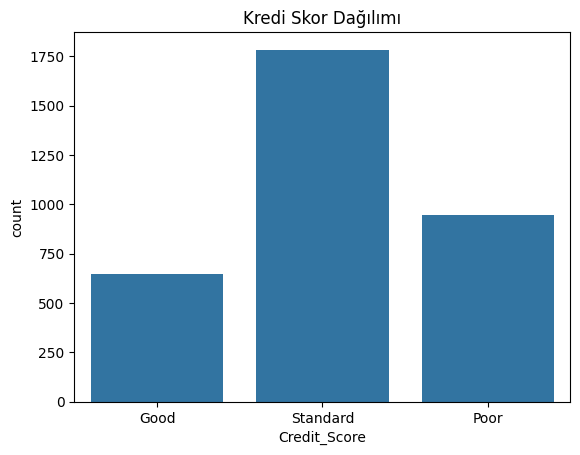

In [7]:
sns.countplot(x='Credit_Score', data=df)
plt.title("Kredi Skor Dağılımı")
plt.show()


In [8]:
le = LabelEncoder()
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])  # Örn: Poor=0, Standard=1, Good=2


In [15]:

print(X.select_dtypes(include='object').columns)


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour'],
      dtype='object')


In [17]:
X = X.drop(['ID'], axis=1)


In [18]:
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [21]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.79      0.72      0.75       148
           1       0.83      0.85      0.84       193
           2       0.79      0.81      0.80       334
           3       0.00      0.00      0.00         1

    accuracy                           0.80       676
   macro avg       0.60      0.60      0.60       676
weighted avg       0.80      0.80      0.80       676



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


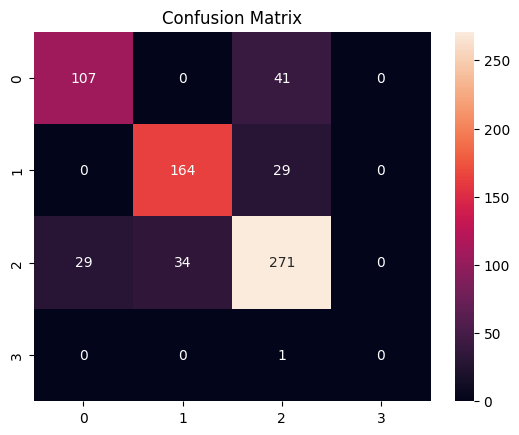

In [22]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


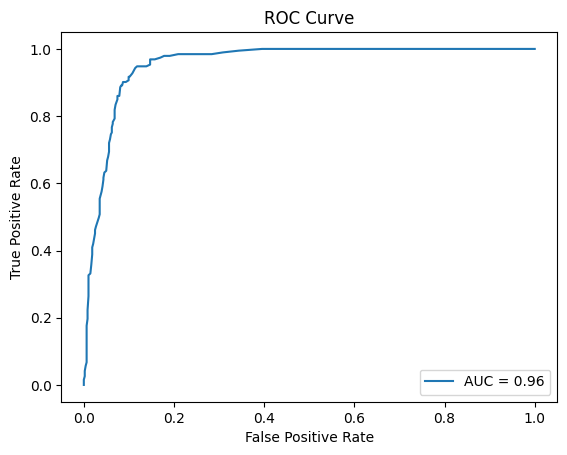

In [23]:
y_prob = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
